In [13]:
import pandas as pd
import yaml
root_path = '/local/work/merengelke/aipal/'
config = yaml.load(open('cfg.yaml', 'r'), Loader=yaml.FullLoader)

cities_countries = config['cities_countries']
paths = [f"{root_path}{city_country}/aipal/predict.csv" for city_country in cities_countries]

df = pd.DataFrame()
for path in paths:
    df_small = pd.read_csv(path)
    df_small['city_country'] = path.split('/')[-3]
    df = pd.concat([df, df_small])
    
# age over 18
if config['is_adult']:
    df = df[df['age'] > 18]
else:
    df = df[df['age'] <= 18]
df.drop(columns=['ELN', 'Diagnosis', 'additional.diagnosis.details..lineage.etc', 'lineage.details'], inplace=True)
features = config['feature_columns']

# remove all empty chars form class
df['class'] = df['class'].str.strip()

In [14]:
# All samples
df[features].describe().round(2)

,Fibrinogen_g_L,MCV_fL,Monocytes_percent,LDH_UI_L,PT_percent,MCHC_g_L,Lymphocytes_G_L,age,Monocytes_G_L,Platelets_G_L
count,3105.00,3452.00,3307.00,3390.00,3403.00,3367.00,3319.00,3472.00,3307.00,3468.00
mean,16.97,95.08,18.13,626.81,74.93,323.45,8.40,52.47,6.02,72.31
std,74.53,19.61,58.64,832.71,23.75,59.89,25.78,17.87,18.43,88.49
min,0.00,26.30,0.00,36.00,0.00,28.20,0.00,18.61,0.00,0.07
25%,2.48,88.50,1.87,239.45,62.46,323.00,0.98,38.00,0.08,24.00
50%,3.51,94.30,7.37,376.95,73.65,335.00,2.02,53.00,0.48,45.00
75%,4.80,100.72,26.17,681.00,87.91,344.00,5.30,67.00,3.00,91.00
max,786.00,1114.40,3000.00,11396.00,205.00,1000.00,402.80,121.44,225.58,2146.00


In [15]:
# AML samples
df[df['class'] == 'AML'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,2498.00,2483.00,2445.00,2435.00,2430.00,2496.00,2156.00,2384.00,2495.00,2390.00,2384.00,2498.00,2498.00,2498.00
mean,56.05,97.06,74.30,577.38,324.11,30.85,16.42,6.87,77.34,6.62,20.45,0.17,0.77,0.06
std,17.13,22.33,24.13,702.79,54.13,53.73,74.86,19.92,94.34,17.40,67.98,0.21,0.24,0.11
min,18.61,56.00,0.00,36.00,29.60,0.02,0.00,0.00,0.07,0.00,0.00,0.00,0.01,0.00
25%,44.00,90.50,62.46,232.00,322.00,2.67,2.85,0.10,26.00,1.05,2.10,0.03,0.66,0.01
50%,57.00,96.60,73.43,364.00,333.00,9.01,3.82,0.61,50.00,2.12,9.13,0.08,0.87,0.02
75%,69.57,102.50,87.19,655.60,342.00,34.76,4.93,3.96,99.00,5.21,30.00,0.22,0.95,0.05
max,121.44,1114.40,172.79,11396.00,1000.00,556.44,786.00,225.58,2146.00,274.59,3000.00,0.98,0.99,0.94


In [16]:
# ALL samples
df[df['class'] == 'ALL'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,555.00,550.00,540.00,548.00,524.00,555.00,531.00,534.00,555.00,535.00,534.00,555.00,555.00,555.00
mean,41.75,89.16,80.27,965.26,319.73,46.11,19.77,4.39,71.38,20.84,8.22,0.45,0.46,0.09
std,15.78,7.43,19.51,1336.76,62.21,83.03,83.16,15.40,82.46,50.53,11.42,0.30,0.30,0.16
min,19.00,59.80,0.00,78.00,30.80,0.50,0.46,0.00,1.00,0.00,0.00,0.01,0.01,0.00
25%,28.00,84.70,68.00,294.00,322.00,4.00,2.50,0.06,20.00,1.40,1.05,0.16,0.18,0.01
50%,40.00,88.30,78.33,538.50,333.00,13.30,3.38,0.32,42.00,3.30,3.07,0.42,0.41,0.03
75%,54.00,92.98,93.00,1018.35,342.00,47.81,4.66,2.02,90.00,13.10,10.09,0.72,0.73,0.07
max,87.00,125.30,143.00,10248.00,379.00,673.18,623.00,217.05,703.00,402.80,69.12,0.98,0.98,0.94


In [17]:
# APL samples
df[df['class'] == 'APL'].describe().round(2)

,age,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL
count,419.00,419.00,418.00,407.00,413.00,419.00,418.00,389.00,418.00,394.00,389.00,419.00,419.00,419.00
mean,45.33,91.15,71.71,466.85,324.34,15.54,16.27,3.05,43.55,2.33,17.50,0.17,0.38,0.45
std,16.94,7.49,25.44,473.90,84.24,26.87,59.85,10.75,43.03,5.81,23.78,0.20,0.29,0.32
min,19.00,26.30,0.00,96.10,28.20,0.20,0.05,0.00,2.00,0.00,0.00,0.00,0.00,0.00
25%,31.00,87.30,55.77,235.50,335.00,1.19,1.04,0.04,17.00,0.53,1.23,0.03,0.12,0.13
50%,44.00,90.70,68.00,326.00,347.00,3.49,1.55,0.20,29.00,0.94,5.65,0.10,0.32,0.46
75%,57.00,95.30,83.00,509.25,359.00,17.39,2.55,1.38,54.75,2.02,26.82,0.21,0.64,0.74
max,97.00,114.60,205.00,6249.00,423.00,205.00,474.00,129.20,275.00,83.77,150.00,0.94,0.97,0.98


In [18]:
import matplotlib.pyplot as plt
import math

def plot_boxplots_by_feature(df, title):
    # Number of features
    n_features = len(features)

    # Calculate rows and columns for two rows
    n_cols = math.ceil(n_features / 2)

    # Adjusting figure size for two rows
    fig, axes = plt.subplots(2, n_cols, figsize=(16, 10), sharey=False)

    # Flatten the axes array for easier iteration
    axes = axes.flatten()

    # Create individual box plots for each feature
    for idx, feature in enumerate(features):
        df.boxplot(column=feature, by='class', ax=axes[idx], showfliers=False)  # Exclude outliers
        axes[idx].set_title(feature)
        axes[idx].set_xlabel("Class")
        axes[idx].set_ylabel("Value")

    # Hide any unused subplots if features are fewer than total subplots
    for ax in axes[n_features:]:
        ax.set_visible(False)

    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Adjust spacing for title
    plt.show()

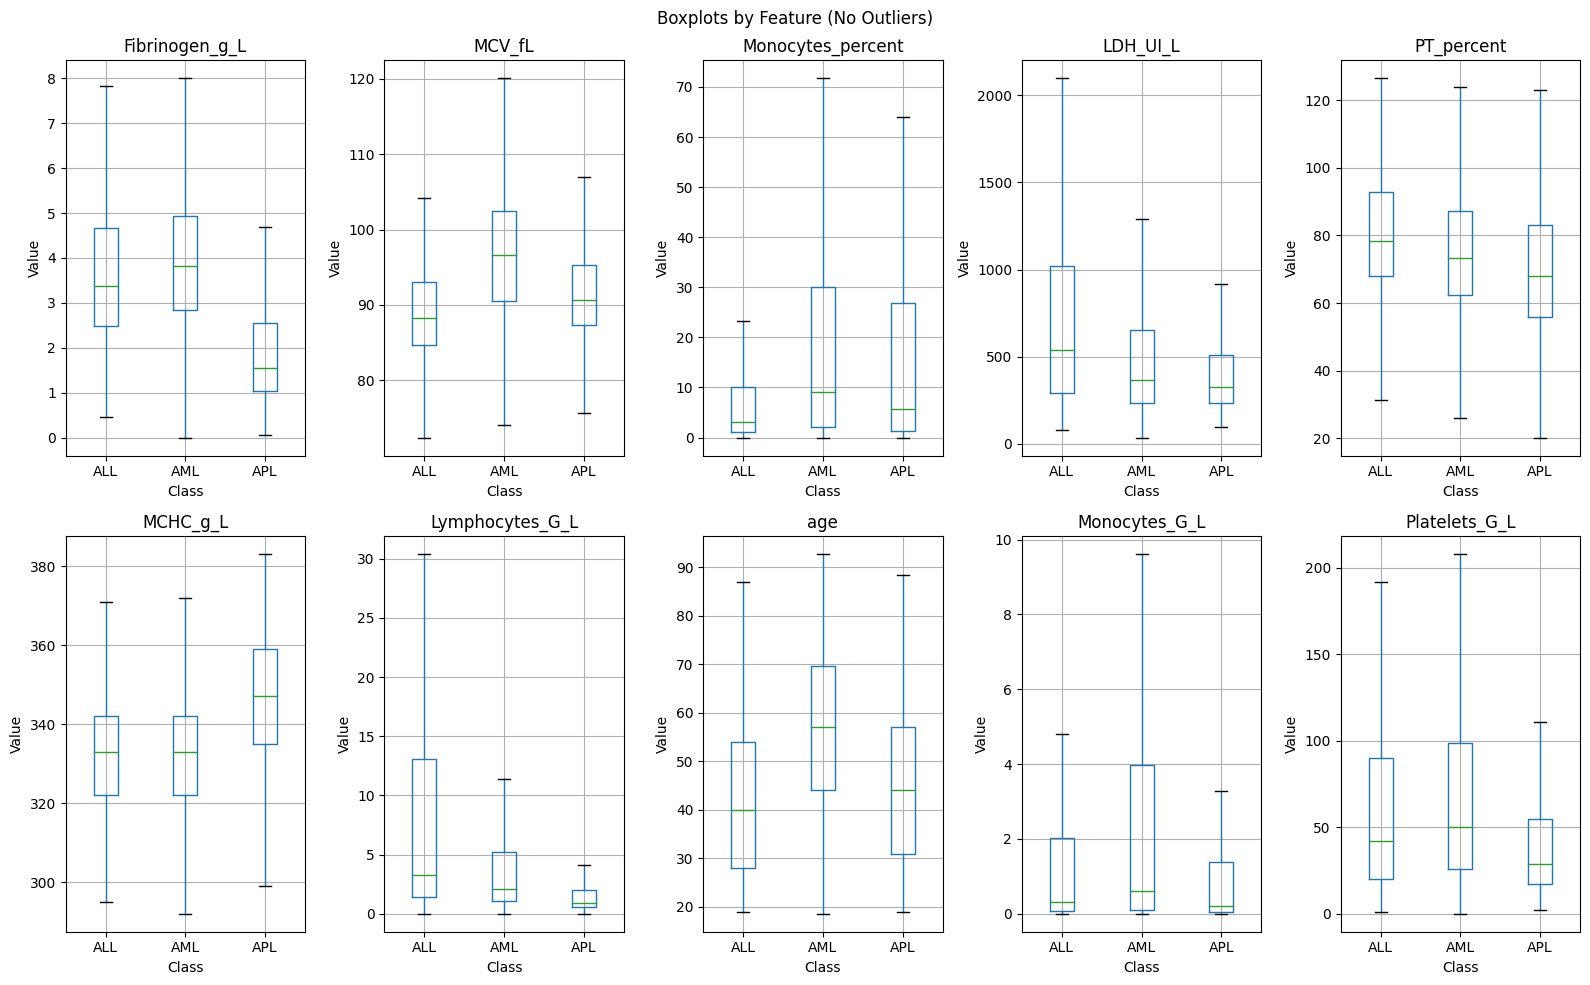

In [19]:
plot_boxplots_by_feature(df, "Boxplots by Feature (No Outliers)")

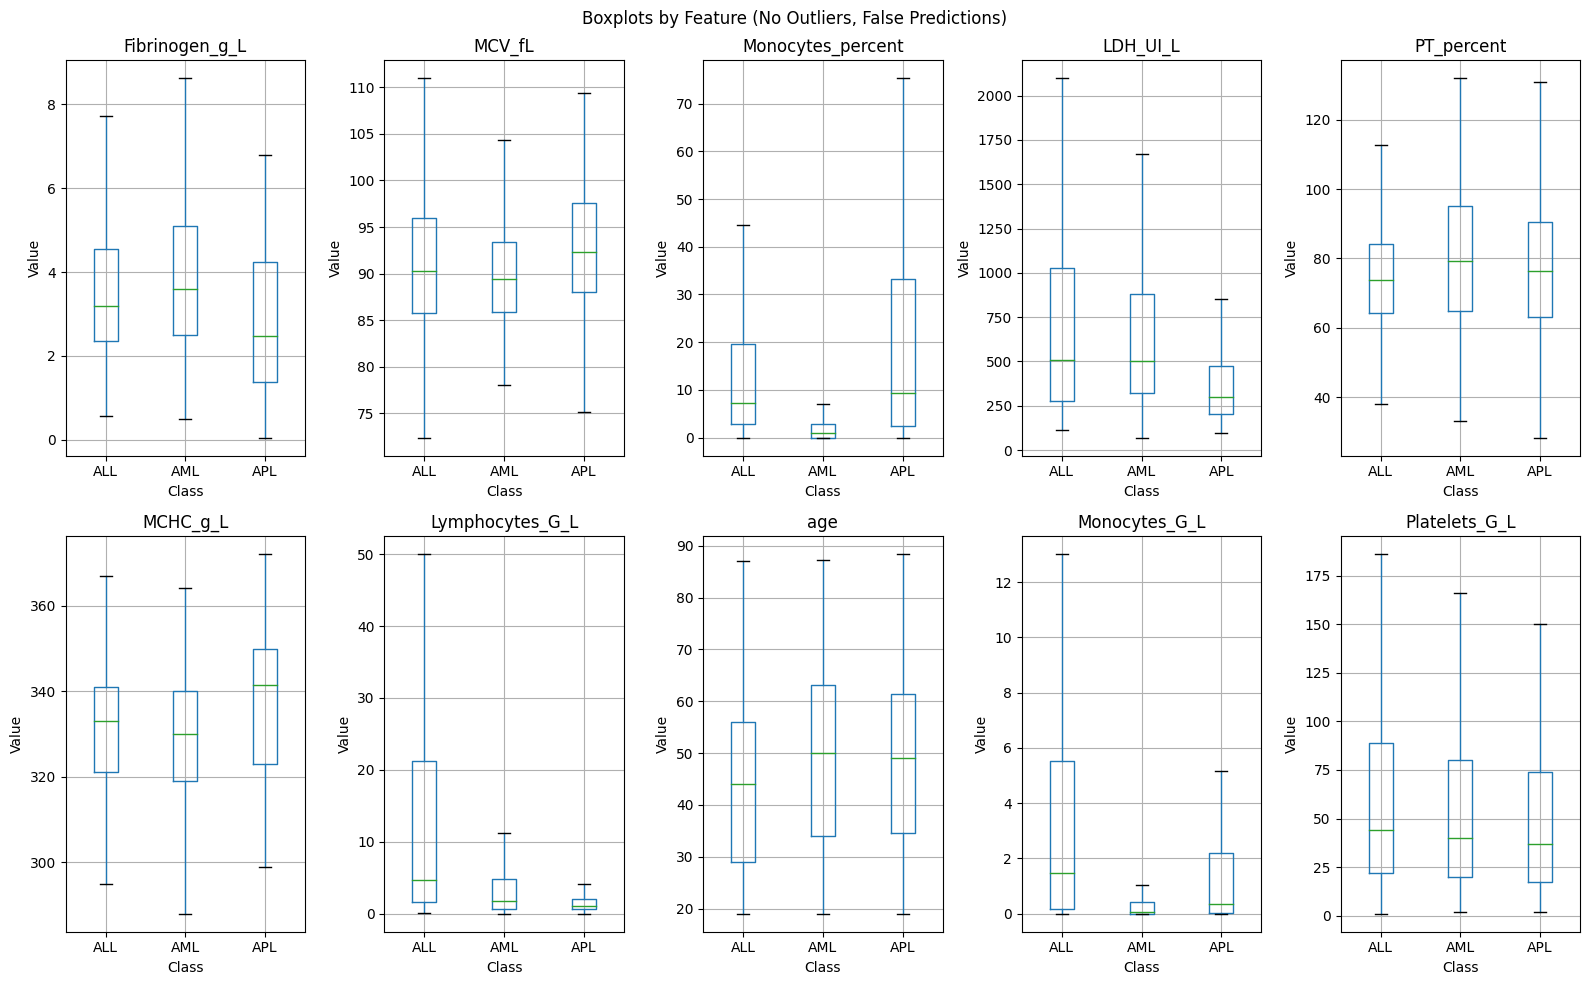

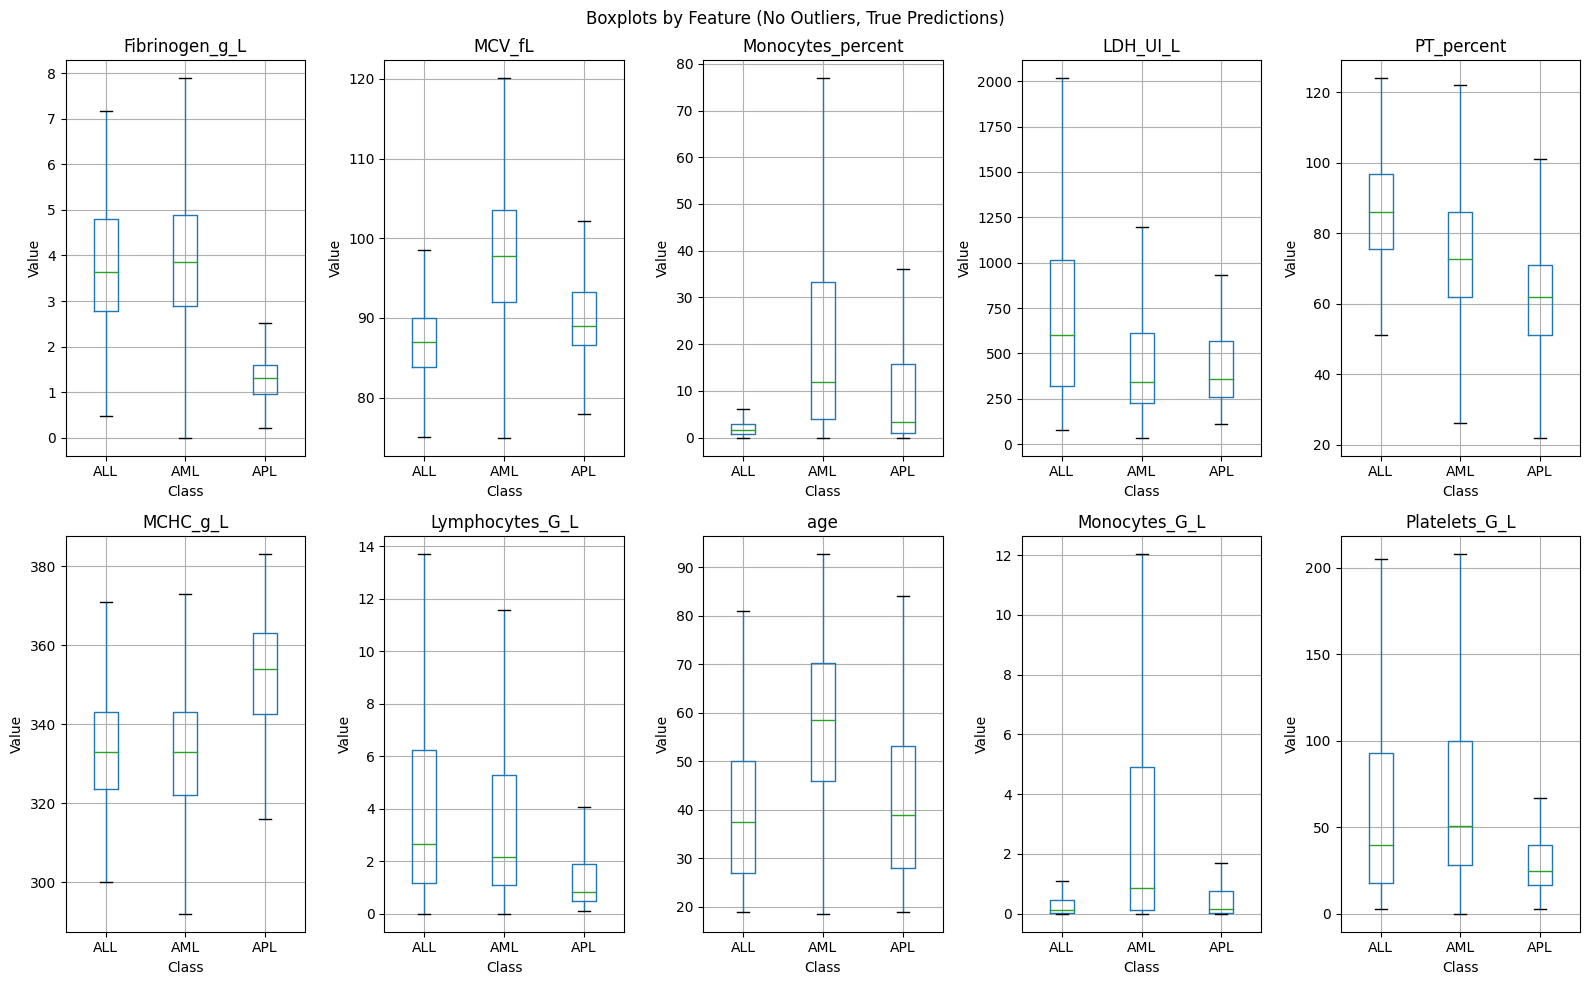

In [20]:
# idmax on 
prediction_columns = ['prediction.ALL', 'prediction.AML', 'prediction.APL']
df['prediction.ALL'].idxmax()

df["predicted_class"] = (
    df[prediction_columns]
    .idxmax(axis=1)
    .str.replace("prediction.", "", regex=False)
)

df_false = df[df["class"] != df["predicted_class"]]
df_true = df[df["class"] == df["predicted_class"]]

# Do bloxplot for each feature by predicted class for tp, fp, tn, fn
plot_boxplots_by_feature(df_false, "Boxplots by Feature (No Outliers, False Predictions)")
plot_boxplots_by_feature(df_true, "Boxplots by Feature (No Outliers, True Predictions)")

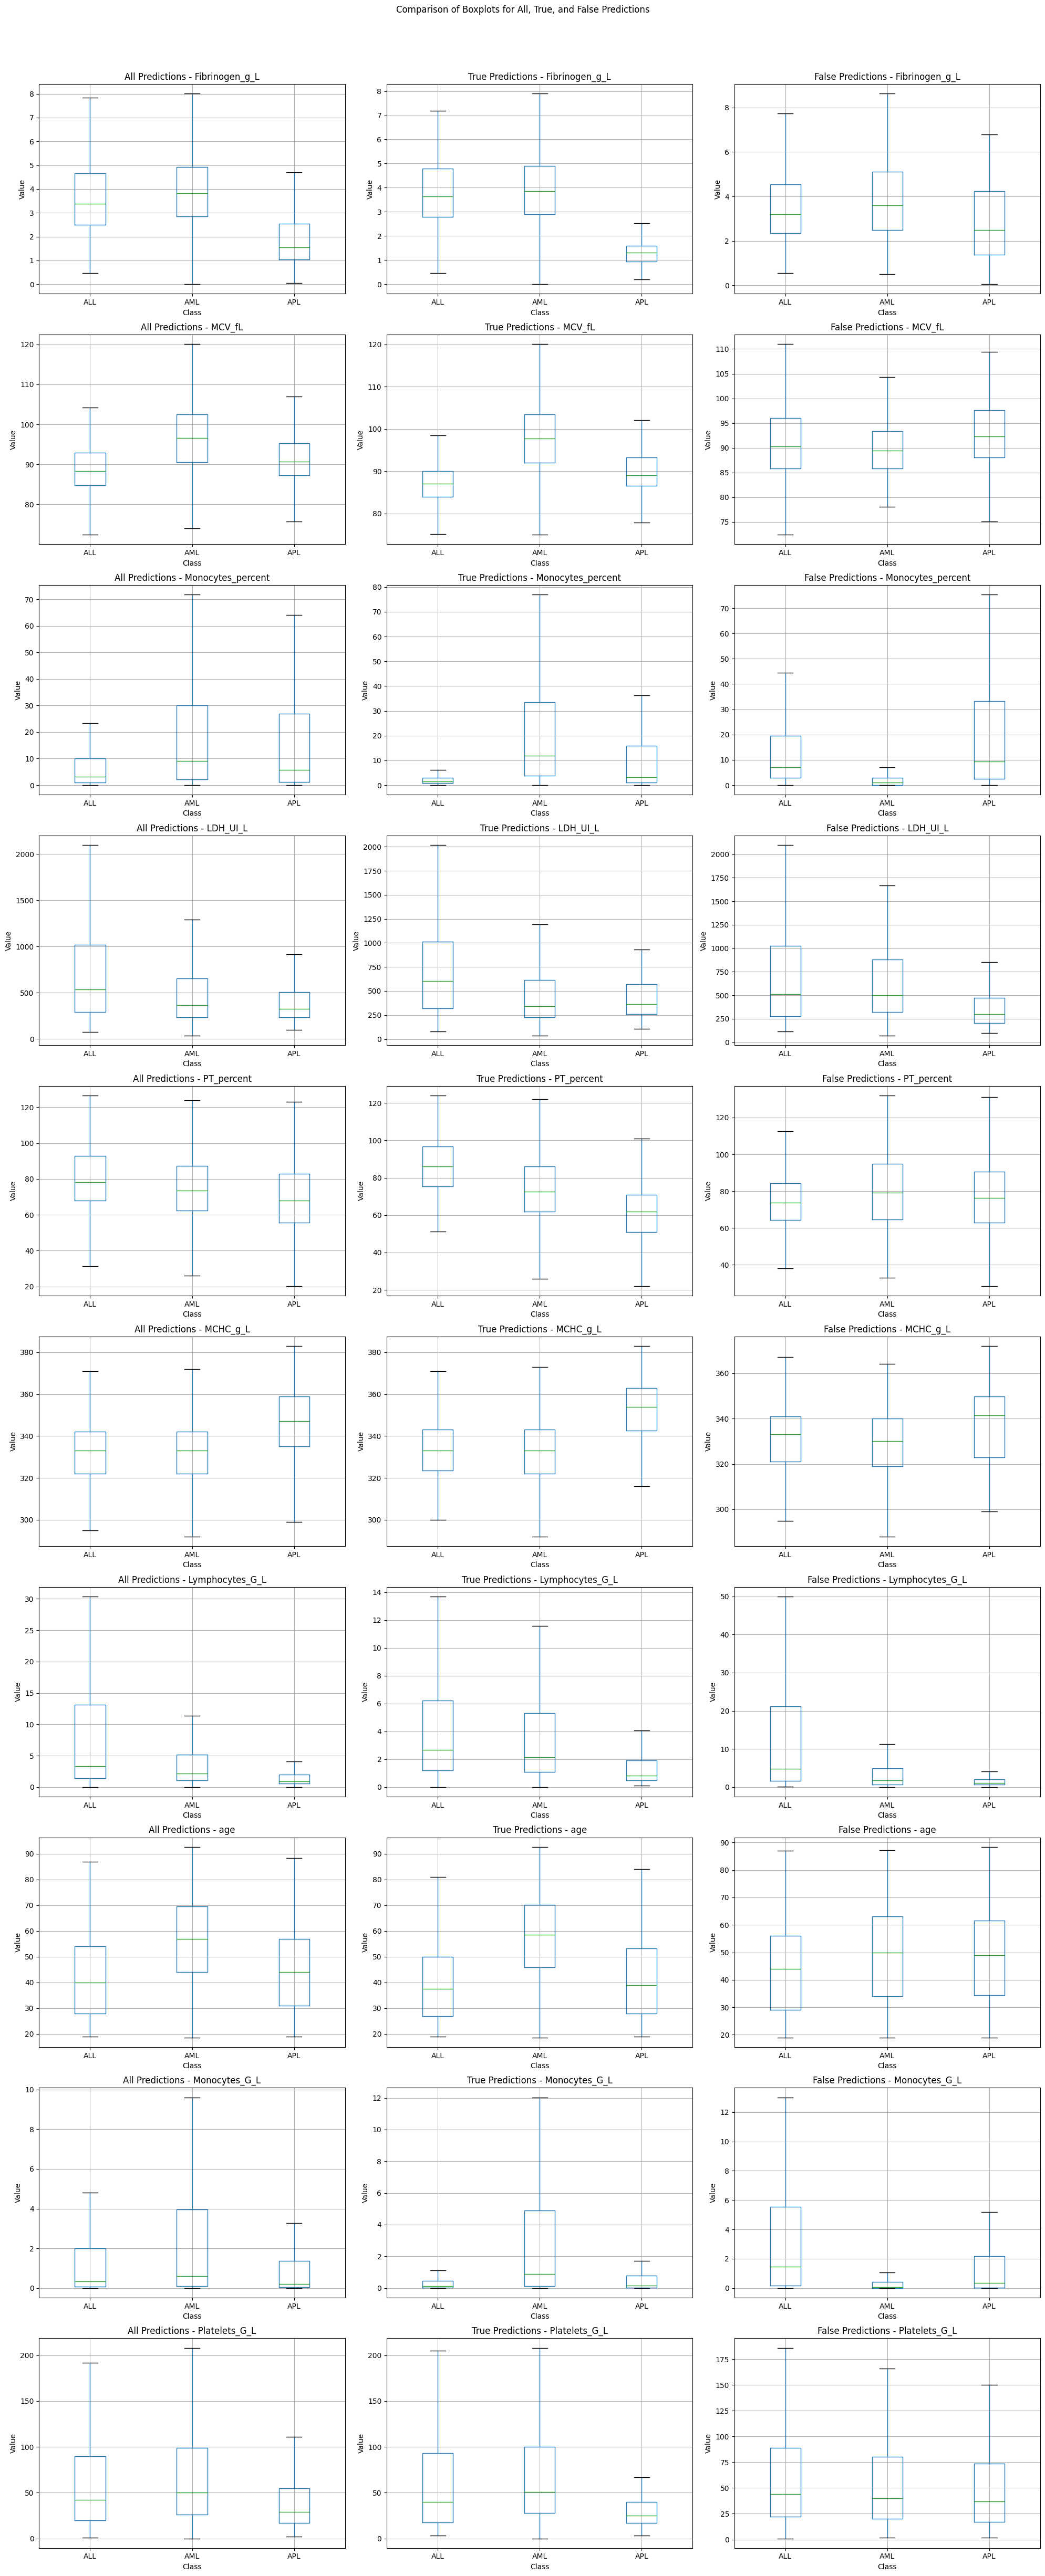

In [21]:
import matplotlib.pyplot as plt
import math

def plot_combined_boxplots(df, title):
    prediction_categories = {
        "All Predictions": df,
        "True Predictions": df[df["class"] == df["predicted_class"]],
        "False Predictions": df[df["class"] != df["predicted_class"]]
    }

    # Number of features to plot
    n_features = len(features)

    # Create a figure for all three categories
    fig, axes = plt.subplots(n_features, 3, figsize=(20, 5 * n_features), sharey=False)

    # Iterate over features and prediction categories
    for row, feature in enumerate(features):
        for col, (category_name, category_df) in enumerate(prediction_categories.items()):
            category_df.boxplot(
                column=feature,
                by='class',
                ax=axes[row, col],
                showfliers=False  # Exclude outliers
            )
            axes[row, col].set_title(f"{category_name} - {feature}")
            axes[row, col].set_xlabel("Class")
            axes[row, col].set_ylabel("Value")

    # Adjust layout and title
    plt.suptitle(title)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# Example usage
plot_combined_boxplots(df, "Comparison of Boxplots for All, True, and False Predictions")

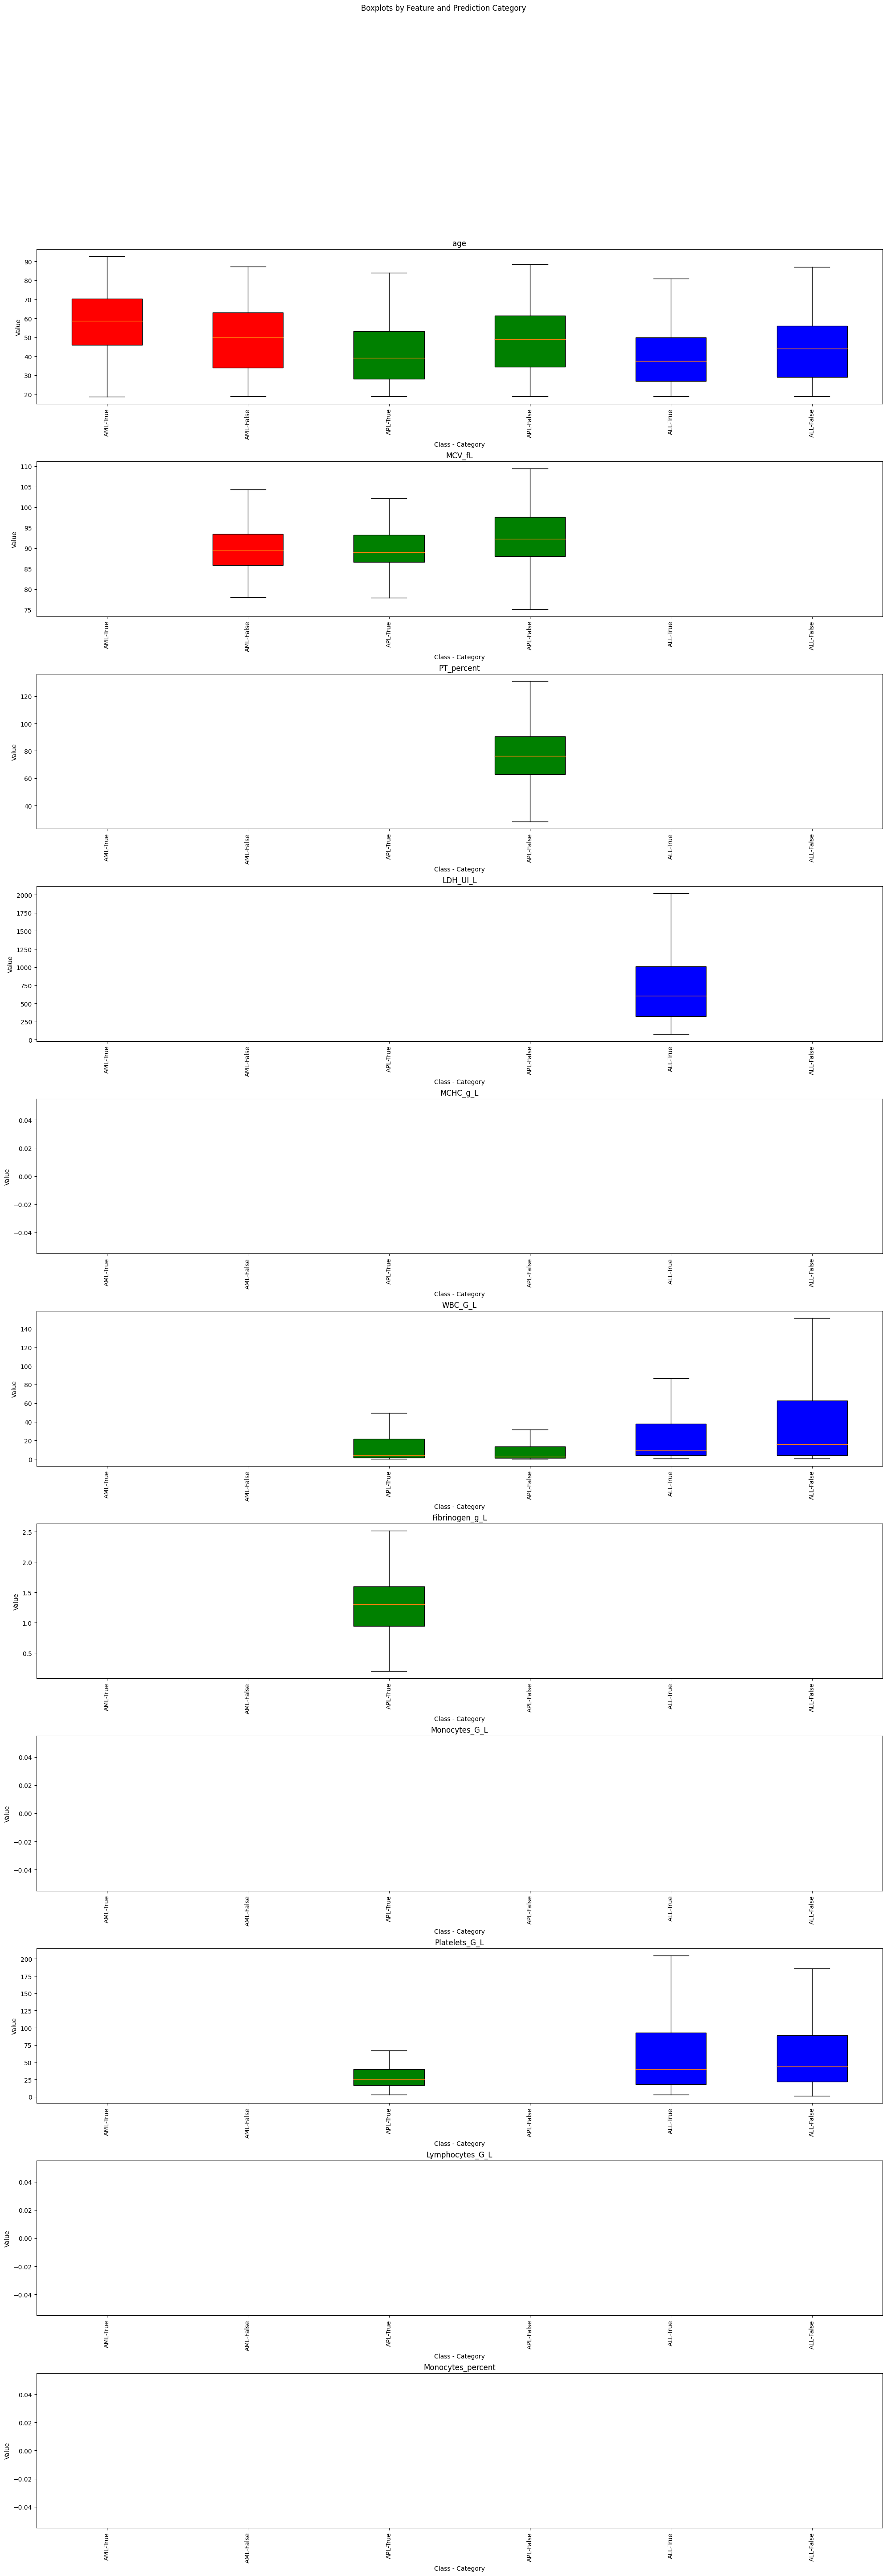

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_combined_boxplots(df, features, title):
    prediction_categories = {
        "True": df[df["class"] == df["predicted_class"]],
        "False": df[df["class"] != df["predicted_class"]]
    }

    # Define colors for classes
    class_colors = {
        "APL": "green",
        "AML": "red",
        "ALL": "blue"
    }

    # Number of features to plot
    n_features = len(features)

    # Create a figure for all combined plots
    fig, axes = plt.subplots(n_features, 1, figsize=(20, 5 * n_features), sharey=False)

    if n_features == 1:
        axes = [axes]  # Ensure axes is iterable if there's only one feature

    for i, feature in enumerate(features):
        feature_data = []
        feature_labels = []
        feature_colors = []

        # Group by class first, then prediction category
        for class_value in df["class"].unique():
            for category_name, category_df in prediction_categories.items():
                class_data = category_df[category_df["class"] == class_value][feature]
                feature_data.append(class_data)
                feature_labels.append(f"{class_value}-{category_name}")
                feature_colors.append(class_colors.get(class_value, "gray"))  # Default to gray if class is unknown

        # Boxplot for the current feature
        ax = axes[i]
        boxplots = ax.boxplot(feature_data, labels=feature_labels, patch_artist=True, showfliers=False)
        
        # Apply colors to the boxes
        for patch, color in zip(boxplots['boxes'], feature_colors):
            patch.set_facecolor(color)

        ax.set_title(f"{feature}")
        ax.set_xlabel("Class - Category")
        ax.set_ylabel("Value")
        ax.tick_params(axis='x', rotation=90)

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.suptitle(title, y=1.05)
    plt.show()

# Example usage
# Assuming `df` is your DataFrame and `features` is a list of feature columns
features = ['age', 'MCV_fL', 'PT_percent', 'LDH_UI_L',
       'MCHC_g_L', 'WBC_G_L', 'Fibrinogen_g_L', 'Monocytes_G_L',
       'Platelets_G_L', 'Lymphocytes_G_L', 'Monocytes_percent']  # Replace with your actual feature names
# features = ['MCV_fL']
plot_combined_boxplots(df, features, "Boxplots by Feature and Prediction Category")

In [23]:
df_true.head()

,ID,age,sex,class,MCV_fL,PT_percent,LDH_UI_L,MCHC_g_L,WBC_G_L,Fibrinogen_g_L,Monocytes_G_L,Platelets_G_L,Lymphocytes_G_L,Monocytes_percent,prediction.ALL,prediction.AML,prediction.APL,city_country,UPN,predicted_class
0,UTSW 1,75.68,Male,AML,90.7,88.44391,897.0,324.0,183.70,3.19,34.9,115.0,18.4,18.998367,0.250296,0.743513,0.006191,dallas,NaN,AML
1,UTSW 2,72.54,Male,AML,79.5,91.05702,221.0,341.0,2.90,NaN,0.2,114.0,1.7,6.896552,0.057397,0.937589,0.005014,dallas,NaN,AML
2,UTSW 3,55.96,Male,AML,104.9,25.09616,434.0,354.0,19.00,10.08,0.6,109.0,3.2,3.157895,0.027329,0.954143,0.018528,dallas,NaN,AML
5,UTSW 6,73.45,Male,AML,108.9,88.44391,203.0,348.0,1.12,NaN,0.0,43.0,0.4,0.000000,0.118258,0.817264,0.064479,dallas,NaN,AML
6,UTSW 7,71.42,Male,AML,109.0,26.05016,191.0,345.0,1.90,NaN,0.1,115.0,1.0,5.263158,0.010650,0.971756,0.017593,dallas,NaN,AML


In [24]:
print(df['PT_percent'].isnull().sum())

69
